In [1]:
import pandas as pa
import matplotlib.pyplot as plt

In [2]:
data = pa.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
import numpy as np
# vytvorenie premennej poľa
error_viz=[]

# konštruktor perceptrona
class Perceptron():   
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii=10): #zadanie parametrov učenia
        #vloženie parametrov do premenných
        self.eta = rychlost_ucenia 
        self.n_iter = pocet_iteracii      
        

        #do funkcie vstupujú x a y z datasetu
    def fit(self, X,y):
        #vytvorenie váh ako nulovú maticu kde prvý stĺpec je bias
        self.vahy = np.zeros(1+ X.shape[1])
        # vytvorenie prázdneho pola pre ukladanie errors
        self.errors_=[]


        for i in range(self.n_iter): # cyklus pre uskutočnenie iterácií teda počet prejdení po datasete
            errors = 0  # premenná sa nastavý na 0   
            # cyklus v ktorom sa uskutočnuje učenie siete. Počas  každého prechodu sa vypočita update násobením rýchlostou učenia
            # k polu váh okrem prvého stĺpca kde je bias sa pripočíta hodnota update vynásobená maticou od druhého prvku po posledný, k biasu sa iba pričíta update
            # do poľa errors sa pripočíta update ak sa nerovná nule teda ak sa sieť stále učí
            for matica,vystup in zip(X,y):
                update = self.eta * (vystup-self.predikcia(matica))
                self.vahy[1:] += update*matica
                self.vahy[0]+= update
                errors += int(update !=0.0)
                  
            self.errors_.append(errors) #do poľa errors je vložená premenná errors    
            error_viz.append((errors))  #do poľa error_viz je vložená premenná errors ktorá bude neskôr daná do grafu na zobrazenie strát pru učení  
        return self  

    def net_input(self, X):
        #pripočítanie k jednotlivým váham bias 
        #bias dovoľuje posunutie celej aktivačnej funkcie vpravo alebo vľavo
        return np.dot(X, self.vahy[1:])+ self.vahy[0]

    def predikcia(self, X):
        #počítanie predikcie, výstup sú 1 ak net_input je väčší ako 0 a -1 v opačnom prípade
        return np.where(self.net_input(X) >= 0.0, 1, -1) 
    

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


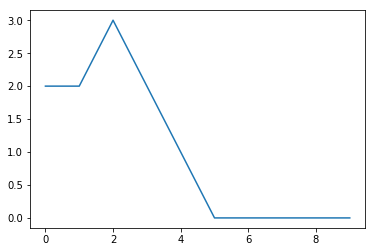

In [4]:
X=data.iloc[:100,[0,2]].values
y=data.iloc[:100,4].values
y=np.where(y=='Iris-setosa',-1,1)

ppn=Perceptron()
ppn.fit(X,y)

print(X[:5])
print(y)

plt.plot(error_viz)

plt.show()
